## Use requests and BeautifulSoup to make a list of all the CORGIS datasets.

### Use requests with the following site: "https://corgis-edu.github.io/corgis/csv/"

In [1]:
import requests

In [2]:
corgiscsv = requests.get('https://corgis-edu.github.io/corgis/csv/')

In [3]:
corgiscsv

<Response [200]>

In [4]:
corgiscsv.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n\n    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>\n    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"\n            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="\n            crossorigi

### The relevant HTML tag to search for is "h3"

In [5]:
from bs4 import BeautifulSoup

In [6]:
html_string = corgiscsv.text
document = BeautifulSoup(html_string, "html.parser")
h3list = document.find_all('h3')
h3list[0].string

'Aids'

In [7]:
h3stringlist = []
for h3 in h3list: 
    print(h3.string)

Aids
Airlines
Billionaires
Broadway
Business Dynamics
Cancer
Cars
Classics
Construction Permits
Construction Spending
County Demographics
Covid
Drugs
Earthquakes
Election
Electricity
Emissions
Energy
Finance
Food
Food Access
Global Development
Graduates
Health
Hospitals
Hydropower
Ingredients
Injuries
Labor
Medal Of Honor
Music
Opioids
Police Shootings
Publishers
Real Estate
Retail Services
School Scores
Skyscrapers
Slavery
State Crime
State Demographics
State Fragility
Suicide Attacks
Supreme Court
Tate
Video Games
Weather
Wind Turbines


## Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [9]:
def pdcorgis(filename):
    filename = filename.lower()
    response = requests.get('https://corgis-edu.github.io/corgis/csv/' + filename + '/')  
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    links = document.find_all('a')
    
    for i in links:
        if i.has_attr('download')==True: 
            download_link = 'https://corgis-edu.github.io/corgis/csv/' + filename + '/' + i['href']
            corgisdf = pd.read_csv(download_link)
            return corgisdf

In [10]:
df = pdcorgis("Classics")

In [11]:
df.head()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022


### Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

<AxesSubplot:ylabel='Frequency'>

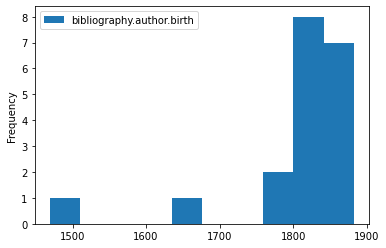

In [12]:
df.iloc[:19].plot(kind='hist', x='bibliography.title', y='bibliography.author.birth')

<AxesSubplot:ylabel='bibliography.title'>

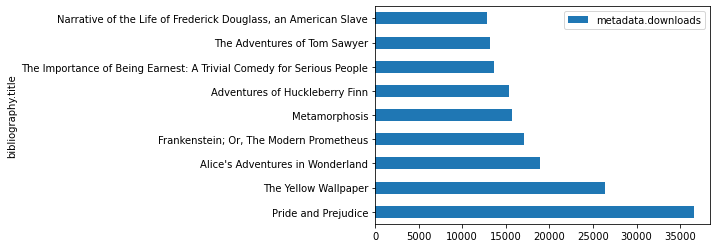

In [13]:
df.iloc[:9].plot(kind='barh', x='bibliography.title', y='metadata.downloads')

In [14]:
pdcorgis("Graduates").head()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999.0,0.0,160585.73,51000.0,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999.0,9000.0,126176.52,56000.0,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999.0,8000.0,148872.00,60000.0,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999.0,10000.0,129070.55,50000.0,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999.0,0.0,134299.53,49000.0,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


<AxesSubplot:xlabel='Education.Major'>

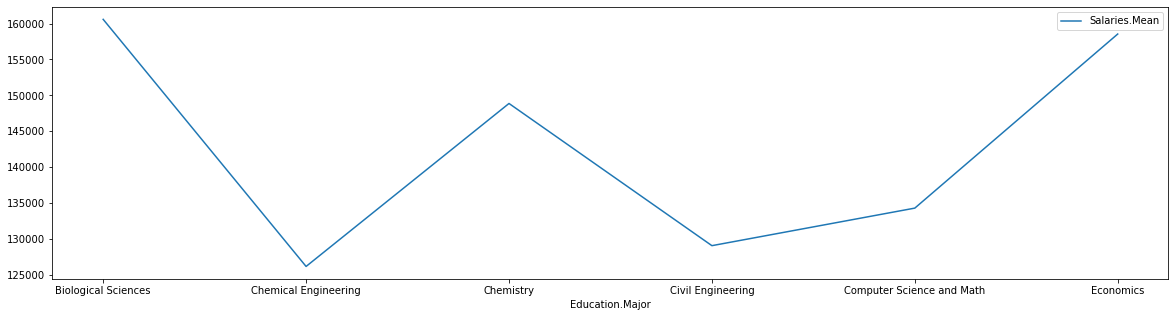

In [15]:
pdcorgis("Graduates").iloc[:6].plot(x='Education.Major', y='Salaries.Mean', figsize=(20,5))